# Pandas - Python Data Analysis Library

Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add_suffix.html

# Case Study 1: Analysis India's COVID pandemic data using DataFrames

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import datetime

# Collection of Data

# Web Scraping

In [2]:
url = 'https://www.mohfw.gov.in/'
web_content = requests.get(url).content
soup = BeautifulSoup(web_content, "html.parser")
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
    if len(stat) == 5:
        stats.append(stat)
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)


In [3]:
state_data

Sr.No                    States/UT Confirmed Recovered Deceased
0      1  Andaman and Nicobar Islands        33        33        0
1      2               Andhra Pradesh      2205      1192       48
2      3            Arunachal Pradesh         1         1        0
3      4                        Assam        87        39        2
4      5                        Bihar       994       411        7
5      6                   Chandigarh       191        37        3
6      7                 Chhattisgarh        60        56        0
7      8           Dadar Nagar Haveli         1         0        0
8      9                        Delhi      8470      3045      115
9     10                          Goa        14         7        0
10    11                      Gujarat      9591      3753      586
11    12                      Haryana       818       439       11
12    13             Himachal Pradesh        74        39        2
13    14            Jammu and Kashmir       983       485       11
14    15                    Jharkhand       197        87        3
15    16                    Karnataka       987       460       35
16    17                       Kerala       560       491        4
17    18                       Ladakh        43        22        0
18    19               Madhya Pradesh      4426      2171      237
19    20                  Maharashtra     27524      6059     1019
20    21                      Manipur         3         2        0
21    22                    Meghalaya        13        11        1
22    23                      Mizoram         1         1        0
23    24                       Odisha       611       158        3
24    25                   Puducherry        13         9        1
25    26                       Punjab      1935       223       32
26    27                    Rajasthan      4534      2580      125
27    28                   Tamil Nadu      9674      2240       66
28    29                    Telengana      1414       950       34
29    30                      Tripura       156        29        0
30    31                  Uttarakhand        78        50        1
31    32                Uttar Pradesh      3902      2072       88
32    33                  West Bengal      2377       768      215

In [4]:
type(state_data)

pandas.core.frame.DataFrame

# Introduction to the DataSet

In [5]:
state_data.head(3)

Sr.No                    States/UT Confirmed Recovered Deceased
0     1  Andaman and Nicobar Islands        33        33        0
1     2               Andhra Pradesh      2205      1192       48
2     3            Arunachal Pradesh         1         1        0

In [6]:
state_data.tail(1)

Sr.No    States/UT Confirmed Recovered Deceased
32    33  West Bengal      2377       768      215

# EDA

In [7]:
state_data

Sr.No                    States/UT Confirmed Recovered Deceased
0      1  Andaman and Nicobar Islands        33        33        0
1      2               Andhra Pradesh      2205      1192       48
2      3            Arunachal Pradesh         1         1        0
3      4                        Assam        87        39        2
4      5                        Bihar       994       411        7
5      6                   Chandigarh       191        37        3
6      7                 Chhattisgarh        60        56        0
7      8           Dadar Nagar Haveli         1         0        0
8      9                        Delhi      8470      3045      115
9     10                          Goa        14         7        0
10    11                      Gujarat      9591      3753      586
11    12                      Haryana       818       439       11
12    13             Himachal Pradesh        74        39        2
13    14            Jammu and Kashmir       983       485       11
14    15                    Jharkhand       197        87        3
15    16                    Karnataka       987       460       35
16    17                       Kerala       560       491        4
17    18                       Ladakh        43        22        0
18    19               Madhya Pradesh      4426      2171      237
19    20                  Maharashtra     27524      6059     1019
20    21                      Manipur         3         2        0
21    22                    Meghalaya        13        11        1
22    23                      Mizoram         1         1        0
23    24                       Odisha       611       158        3
24    25                   Puducherry        13         9        1
25    26                       Punjab      1935       223       32
26    27                    Rajasthan      4534      2580      125
27    28                   Tamil Nadu      9674      2240       66
28    29                    Telengana      1414       950       34
29    30                      Tripura       156        29        0
30    31                  Uttarakhand        78        50        1
31    32                Uttar Pradesh      3902      2072       88
32    33                  West Bengal      2377       768      215

In [8]:
dfc=state_data.copy()

In [9]:
dfc.head()

Sr.No                    States/UT Confirmed Recovered Deceased
0     1  Andaman and Nicobar Islands        33        33        0
1     2               Andhra Pradesh      2205      1192       48
2     3            Arunachal Pradesh         1         1        0
3     4                        Assam        87        39        2
4     5                        Bihar       994       411        7

In [10]:
state_data.columns

Index(['Sr.No', 'States/UT', 'Confirmed', 'Recovered', 'Deceased'], dtype='object')

# Check Datatypes and Convert, if required

In [11]:
print('States/UT',type(state_data['States/UT'][0]))
print('Confirmed:',type(state_data['Confirmed'][0]))
print('Recovered:',type(state_data['Recovered'][0]))
print('Deceased:',type(state_data['Deceased'][0]))

States/UT <class 'str'>
Confirmed: <class 'str'>
Recovered: <class 'str'>
Deceased: <class 'str'>


In [12]:
state_data['Confirmed']=state_data['Confirmed'].map(int)
state_data['Recovered']=state_data['Recovered'].map(int)
state_data['Deceased']=state_data['Deceased'].map(int)

In [13]:
print('Confirmed:',type(state_data['Confirmed'][0]))
print('Recovered:',type(state_data['Recovered'][0]))
print('Deceased:',type(state_data['Deceased'][0]))

Confirmed: <class 'numpy.int64'>
Recovered: <class 'numpy.int64'>
Deceased: <class 'numpy.int64'>


In [14]:
state_data.shape

(33, 5)

In [15]:
state_data.size

165

# Check for null values

In [16]:
#Check for null values
state_data.apply(lambda x: x.isna().sum())

Sr.No        0
States/UT    0
Confirmed    0
Recovered    0
Deceased     0
dtype: int64

In [17]:
state_data.apply(lambda x: x.isna().sum()).sum()

0

In [18]:
state_data.isna().values.any()

False

# More Information on DataFrame

In [19]:
state_data.dtypes

Sr.No        object
States/UT    object
Confirmed     int64
Recovered     int64
Deceased      int64
dtype: object

In [20]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sr.No      33 non-null     object
 1   States/UT  33 non-null     object
 2   Confirmed  33 non-null     int64 
 3   Recovered  33 non-null     int64 
 4   Deceased   33 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ KB


# Describe()

In [21]:
state_data.describe()

Confirmed    Recovered     Deceased
count     33.000000    33.000000    33.000000
mean    2483.939394   846.060606    80.272727
std     5265.794426  1382.758157   202.986495
min        1.000000     0.000000     0.000000
25%       43.000000    29.000000     0.000000
50%      560.000000   158.000000     3.000000
75%     2205.000000   950.000000    48.000000
max    27524.000000  6059.000000  1019.000000

In [22]:
state_data.describe().loc['count']

Confirmed    33.0
Recovered    33.0
Deceased     33.0
Name: count, dtype: float64

In [23]:
state_data.describe().loc['max']

Confirmed    27524.0
Recovered     6059.0
Deceased      1019.0
Name: max, dtype: float64

In [24]:
state_data[state_data['Confirmed']==state_data.describe().loc['max'][0]]

Sr.No    States/UT  Confirmed  Recovered  Deceased
19    20  Maharashtra      27524       6059      1019

In [25]:
state_data[state_data['Confirmed']==state_data.describe().loc['max'][0]]['States/UT']

19    Maharashtra
Name: States/UT, dtype: object

In [26]:
state_data[state_data['Confirmed']==state_data.describe().loc['min'][0]][['States/UT','Confirmed']]

States/UT  Confirmed
2    Arunachal Pradesh          1
7   Dadar Nagar Haveli          1
22             Mizoram          1

In [27]:
state_data[state_data['Confirmed']==state_data.describe().loc['min'][0]]['States/UT']

2      Arunachal Pradesh
7     Dadar Nagar Haveli
22               Mizoram
Name: States/UT, dtype: object

In [28]:
lis = list(state_data[state_data['Confirmed']==state_data.describe().loc['min'][0]]['States/UT'])

In [29]:
lis

['Arunachal Pradesh', 'Dadar Nagar Haveli', 'Mizoram']

In [30]:
state_data[state_data['Confirmed']>state_data.describe().loc['mean'][0]]['States/UT']

8              Delhi
10           Gujarat
18    Madhya Pradesh
19       Maharashtra
26         Rajasthan
27        Tamil Nadu
31     Uttar Pradesh
Name: States/UT, dtype: object

In [31]:
state_data[state_data['Confirmed']>state_data.describe().loc['mean'][0]]['States/UT']

8              Delhi
10           Gujarat
18    Madhya Pradesh
19       Maharashtra
26         Rajasthan
27        Tamil Nadu
31     Uttar Pradesh
Name: States/UT, dtype: object

# Display in a Table

In [32]:
state_data

Sr.No                    States/UT  Confirmed  Recovered  Deceased
0      1  Andaman and Nicobar Islands         33         33         0
1      2               Andhra Pradesh       2205       1192        48
2      3            Arunachal Pradesh          1          1         0
3      4                        Assam         87         39         2
4      5                        Bihar        994        411         7
5      6                   Chandigarh        191         37         3
6      7                 Chhattisgarh         60         56         0
7      8           Dadar Nagar Haveli          1          0         0
8      9                        Delhi       8470       3045       115
9     10                          Goa         14          7         0
10    11                      Gujarat       9591       3753       586
11    12                      Haryana        818        439        11
12    13             Himachal Pradesh         74         39         2
13    14            Jammu and Kashmir        983        485        11
14    15                    Jharkhand        197         87         3
15    16                    Karnataka        987        460        35
16    17                       Kerala        560        491         4
17    18                       Ladakh         43         22         0
18    19               Madhya Pradesh       4426       2171       237
19    20                  Maharashtra      27524       6059      1019
20    21                      Manipur          3          2         0
21    22                    Meghalaya         13         11         1
22    23                      Mizoram          1          1         0
23    24                       Odisha        611        158         3
24    25                   Puducherry         13          9         1
25    26                       Punjab       1935        223        32
26    27                    Rajasthan       4534       2580       125
27    28                   Tamil Nadu       9674       2240        66
28    29                    Telengana       1414        950        34
29    30                      Tripura        156         29         0
30    31                  Uttarakhand         78         50         1
31    32                Uttar Pradesh       3902       2072        88
32    33                  West Bengal       2377        768       215

In [33]:
table=PrettyTable()
table.field_names=(new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["",'Total',sum(state_data['Confirmed']),sum(state_data['Recovered']),sum(state_data['Deceased'])])
table.add_row(["",'Average',
               round((state_data['Confirmed']).mean(),2),
               round((state_data['Recovered']).mean(),2),
               round((state_data['Deceased']).mean(),2)])
table.add_row(["",'Maximum',state_data.describe().loc['max'][0],state_data.describe().loc['max'][1],
              state_data.describe().loc['max'][2]])

print(table)

+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     33    |     33    |    0     |
|   2   |        Andhra Pradesh       |    2205   |    1192   |    48    |
|   3   |      Arunachal Pradesh      |     1     |     1     |    0     |
|   4   |            Assam            |     87    |     39    |    2     |
|   5   |            Bihar            |    994    |    411    |    7     |
|   6   |          Chandigarh         |    191    |     37    |    3     |
|   7   |         Chhattisgarh        |     60    |     56    |    0     |
|   8   |      Dadar Nagar Haveli     |     1     |     0     |    0     |
|   9   |            Delhi            |    8470   |    3045   |   115    |
|   10  |             Goa             |     14    |     7     |    0     |
|   11  |           Gujar

# Deep Copy 

In [34]:
dfc.Confirmed.dtype

dtype('O')

In [35]:
state_data['Confirmed'].dtype

dtype('int64')

# Feature Engineering

In [36]:
state_data

Sr.No                    States/UT  Confirmed  Recovered  Deceased
0      1  Andaman and Nicobar Islands         33         33         0
1      2               Andhra Pradesh       2205       1192        48
2      3            Arunachal Pradesh          1          1         0
3      4                        Assam         87         39         2
4      5                        Bihar        994        411         7
5      6                   Chandigarh        191         37         3
6      7                 Chhattisgarh         60         56         0
7      8           Dadar Nagar Haveli          1          0         0
8      9                        Delhi       8470       3045       115
9     10                          Goa         14          7         0
10    11                      Gujarat       9591       3753       586
11    12                      Haryana        818        439        11
12    13             Himachal Pradesh         74         39         2
13    14            Jammu and Kashmir        983        485        11
14    15                    Jharkhand        197         87         3
15    16                    Karnataka        987        460        35
16    17                       Kerala        560        491         4
17    18                       Ladakh         43         22         0
18    19               Madhya Pradesh       4426       2171       237
19    20                  Maharashtra      27524       6059      1019
20    21                      Manipur          3          2         0
21    22                    Meghalaya         13         11         1
22    23                      Mizoram          1          1         0
23    24                       Odisha        611        158         3
24    25                   Puducherry         13          9         1
25    26                       Punjab       1935        223        32
26    27                    Rajasthan       4534       2580       125
27    28                   Tamil Nadu       9674       2240        66
28    29                    Telengana       1414        950        34
29    30                      Tripura        156         29         0
30    31                  Uttarakhand         78         50         1
31    32                Uttar Pradesh       3902       2072        88
32    33                  West Bengal       2377        768       215

In [37]:
df=state_data.copy()

Add 
1. Active Cases
2. Recovery Rate
3. Fatality Rate wrt State
4. Fatality Rate wrt Country


# Setting Index

In [38]:
df.set_index('States/UT',drop=True,inplace=True)

In [39]:
df

Sr.No  Confirmed  Recovered  Deceased
States/UT                                                        
Andaman and Nicobar Islands     1         33         33         0
Andhra Pradesh                  2       2205       1192        48
Arunachal Pradesh               3          1          1         0
Assam                           4         87         39         2
Bihar                           5        994        411         7
Chandigarh                      6        191         37         3
Chhattisgarh                    7         60         56         0
Dadar Nagar Haveli              8          1          0         0
Delhi                           9       8470       3045       115
Goa                            10         14          7         0
Gujarat                        11       9591       3753       586
Haryana                        12        818        439        11
Himachal Pradesh               13         74         39         2
Jammu and Kashmir              14        983        485        11
Jharkhand                      15        197         87         3
Karnataka                      16        987        460        35
Kerala                         17        560        491         4
Ladakh                         18         43         22         0
Madhya Pradesh                 19       4426       2171       237
Maharashtra                    20      27524       6059      1019
Manipur                        21          3          2         0
Meghalaya                      22         13         11         1
Mizoram                        23          1          1         0
Odisha                         24        611        158         3
Puducherry                     25         13          9         1
Punjab                         26       1935        223        32
Rajasthan                      27       4534       2580       125
Tamil Nadu                     28       9674       2240        66
Telengana                      29       1414        950        34
Tripura                        30        156         29         0
Uttarakhand                    31         78         50         1
Uttar Pradesh                  32       3902       2072        88
West Bengal                    33       2377        768       215

# Dropping Columns

In [40]:
df.drop(columns='Sr.No',inplace=True)
df

Confirmed  Recovered  Deceased
States/UT                                                  
Andaman and Nicobar Islands         33         33         0
Andhra Pradesh                    2205       1192        48
Arunachal Pradesh                    1          1         0
Assam                               87         39         2
Bihar                              994        411         7
Chandigarh                         191         37         3
Chhattisgarh                        60         56         0
Dadar Nagar Haveli                   1          0         0
Delhi                             8470       3045       115
Goa                                 14          7         0
Gujarat                           9591       3753       586
Haryana                            818        439        11
Himachal Pradesh                    74         39         2
Jammu and Kashmir                  983        485        11
Jharkhand                          197         87         3
Karnataka                          987        460        35
Kerala                             560        491         4
Ladakh                              43         22         0
Madhya Pradesh                    4426       2171       237
Maharashtra                      27524       6059      1019
Manipur                              3          2         0
Meghalaya                           13         11         1
Mizoram                              1          1         0
Odisha                             611        158         3
Puducherry                          13          9         1
Punjab                            1935        223        32
Rajasthan                         4534       2580       125
Tamil Nadu                        9674       2240        66
Telengana                         1414        950        34
Tripura                            156         29         0
Uttarakhand                         78         50         1
Uttar Pradesh                     3902       2072        88
West Bengal                       2377        768       215

# Adding new column

In [41]:
df['Recovery_Rate']=df['Confirmed']/df['Confirmed'].sum()

In [42]:
df

Confirmed  Recovered  Deceased  Recovery_Rate
States/UT                                                                 
Andaman and Nicobar Islands         33         33         0       0.000403
Andhra Pradesh                    2205       1192        48       0.026900
Arunachal Pradesh                    1          1         0       0.000012
Assam                               87         39         2       0.001061
Bihar                              994        411         7       0.012126
Chandigarh                         191         37         3       0.002330
Chhattisgarh                        60         56         0       0.000732
Dadar Nagar Haveli                   1          0         0       0.000012
Delhi                             8470       3045       115       0.103330
Goa                                 14          7         0       0.000171
Gujarat                           9591       3753       586       0.117006
Haryana                            818        439        11       0.009979
Himachal Pradesh                    74         39         2       0.000903
Jammu and Kashmir                  983        485        11       0.011992
Jharkhand                          197         87         3       0.002403
Karnataka                          987        460        35       0.012041
Kerala                             560        491         4       0.006832
Ladakh                              43         22         0       0.000525
Madhya Pradesh                    4426       2171       237       0.053995
Maharashtra                      27524       6059      1019       0.335781
Manipur                              3          2         0       0.000037
Meghalaya                           13         11         1       0.000159
Mizoram                              1          1         0       0.000012
Odisha                             611        158         3       0.007454
Puducherry                          13          9         1       0.000159
Punjab                            1935        223        32       0.023606
Rajasthan                         4534       2580       125       0.055313
Tamil Nadu                        9674       2240        66       0.118019
Telengana                         1414        950        34       0.017250
Tripura                            156         29         0       0.001903
Uttarakhand                         78         50         1       0.000952
Uttar Pradesh                     3902       2072        88       0.047603
West Bengal                       2377        768       215       0.028998

In [43]:
df['Confirmed'].sum()

81970

In [44]:
df['Fatality_Rate(State)']=df['Deceased']/df['Confirmed'].sum()

In [45]:
df['Death Share']=df['Deceased']/df['Deceased'].sum()

In [46]:
df.head()

Confirmed  Recovered  Deceased  Recovery_Rate  \
States/UT                                                                    
Andaman and Nicobar Islands         33         33         0       0.000403   
Andhra Pradesh                    2205       1192        48       0.026900   
Arunachal Pradesh                    1          1         0       0.000012   
Assam                               87         39         2       0.001061   
Bihar                              994        411         7       0.012126   

                             Fatality_Rate(State)  Death Share  
States/UT                                                       
Andaman and Nicobar Islands              0.000000     0.000000  
Andhra Pradesh                           0.000586     0.018120  
Arunachal Pradesh                        0.000000     0.000000  
Assam                                    0.000024     0.000755  
Bihar                                    0.000085     0.002643

# Check for duplicates

In [47]:
state_data.index.duplicated().sum()

0

# Largest and smallest values - Pandas Helper Functions

In [48]:
df.index.nunique()

33

In [49]:
print('Maximum Death Share of {:.2f} % is of Indian State called {} as on {}'.format(df['Death Share'].max()*100,df['Death Share'].idxmax(),datetime.datetime.now()))

Maximum Death Share of 38.47 % is of Indian State called Maharashtra as on 2020-05-15 20:27:54.089107


In [50]:
print('Minimum Death Share of {:.2f} % is of Indian State called {} as on {}'.format(df['Death Share'].min()*100,df['Death Share'].idxmin(),datetime.datetime.now()))

Minimum Death Share of 0.00 % is of Indian State called Andaman and Nicobar Islands as on 2020-05-15 20:27:54.143300


In [51]:
df.nlargest(5,'Death Share')

Confirmed  Recovered  Deceased  Recovery_Rate  \
States/UT                                                       
Maharashtra         27524       6059      1019       0.335781   
Gujarat              9591       3753       586       0.117006   
Madhya Pradesh       4426       2171       237       0.053995   
West Bengal          2377        768       215       0.028998   
Rajasthan            4534       2580       125       0.055313   

                Fatality_Rate(State)  Death Share  
States/UT                                          
Maharashtra                 0.012431     0.384673  
Gujarat                     0.007149     0.221216  
Madhya Pradesh              0.002891     0.089468  
West Bengal                 0.002623     0.081163  
Rajasthan                   0.001525     0.047188

In [52]:
df.nlargest(3,'Death Share').index.values

array(['Maharashtra', 'Gujarat', 'Madhya Pradesh'], dtype=object)

In [53]:
df.nlargest(3,'Confirmed').index.values

array(['Maharashtra', 'Tamil Nadu', 'Gujarat'], dtype=object)

In [54]:
df.nsmallest(3,'Confirmed').index.values

array(['Arunachal Pradesh', 'Dadar Nagar Haveli', 'Mizoram'], dtype=object)

# Insert a new column at a desired location

In [55]:
s_Active = pd.Series(df.Confirmed-df.Recovered-df.Deceased)
df.insert(loc=3, column='Active Cases', value=s_Active, allow_duplicates = False)

In [56]:
df

Confirmed  Recovered  Deceased  Active Cases  \
States/UT                                                                   
Andaman and Nicobar Islands         33         33         0             0   
Andhra Pradesh                    2205       1192        48           965   
Arunachal Pradesh                    1          1         0             0   
Assam                               87         39         2            46   
Bihar                              994        411         7           576   
Chandigarh                         191         37         3           151   
Chhattisgarh                        60         56         0             4   
Dadar Nagar Haveli                   1          0         0             1   
Delhi                             8470       3045       115          5310   
Goa                                 14          7         0             7   
Gujarat                           9591       3753       586          5252   
Haryana                            818        439        11           368   
Himachal Pradesh                    74         39         2            33   
Jammu and Kashmir                  983        485        11           487   
Jharkhand                          197         87         3           107   
Karnataka                          987        460        35           492   
Kerala                             560        491         4            65   
Ladakh                              43         22         0            21   
Madhya Pradesh                    4426       2171       237          2018   
Maharashtra                      27524       6059      1019         20446   
Manipur                              3          2         0             1   
Meghalaya                           13         11         1             1   
Mizoram                              1          1         0             0   
Odisha                             611        158         3           450   
Puducherry                          13          9         1             3   
Punjab                            1935        223        32          1680   
Rajasthan                         4534       2580       125          1829   
Tamil Nadu                        9674       2240        66          7368   
Telengana                         1414        950        34           430   
Tripura                            156         29         0           127   
Uttarakhand                         78         50         1            27   
Uttar Pradesh                     3902       2072        88          1742   
West Bengal                       2377        768       215          1394   

                             Recovery_Rate  Fatality_Rate(State)  Death Share  
States/UT                                                                      
Andaman and Nicobar Islands       0.000403              0.000000     0.000000  
Andhra Pradesh                    0.026900              0.000586     0.018120  
Arunachal Pradesh                 0.000012              0.000000     0.000000  
Assam                             0.001061              0.000024     0.000755  
Bihar                             0.012126              0.000085     0.002643  
Chandigarh                        0.002330              0.000037     0.001133  
Chhattisgarh                      0.000732              0.000000     0.000000  
Dadar Nagar Haveli                0.000012              0.000000     0.000000  
Delhi                             0.103330              0.001403     0.043413  
Goa                               0.000171              0.000000     0.000000  
Gujarat                           0.117006              0.007149     0.221216  
Haryana                           0.009979              0.000134     0.004153  
Himachal Pradesh                  0.000903              0.000024     0.000755  
Jammu and Kashmir                 0.011992              0.000134     0.004153  
Jharkhand                         0.002403           

In [57]:
df.rank()

Confirmed  Recovered  Deceased  Active Cases  \
States/UT                                                                   
Andaman and Nicobar Islands        8.0       10.0       5.0           2.0   
Andhra Pradesh                    25.0       26.0      25.0          24.0   
Arunachal Pradesh                  2.0        2.5       5.0           2.0   
Assam                             13.0       12.5      13.5          13.0   
Bihar                             22.0       19.0      19.0          23.0   
Chandigarh                        15.0       11.0      16.0          17.0   
Chhattisgarh                      10.0       15.0       5.0           8.0   
Dadar Nagar Haveli                 2.0        1.0       5.0           5.0   
Delhi                             30.0       31.0      28.0          31.0   
Goa                                7.0        5.0       5.0           9.0   
Gujarat                           31.0       32.0      32.0          30.0   
Haryana                           19.0       20.0      20.5          18.0   
Himachal Pradesh                  11.0       12.5      13.5          12.0   
Jammu and Kashmir                 20.0       22.0      20.5          21.0   
Jharkhand                         16.0       16.0      16.0          15.0   
Karnataka                         21.0       21.0      24.0          22.0   
Kerala                            17.0       23.0      18.0          14.0   
Ladakh                             9.0        8.0       5.0          10.0   
Madhya Pradesh                    28.0       28.0      31.0          29.0   
Maharashtra                       33.0       33.0      33.0          33.0   
Manipur                            4.0        4.0       5.0           5.0   
Meghalaya                          5.5        7.0      11.0           5.0   
Mizoram                            2.0        2.5       5.0           2.0   
Odisha                            18.0       17.0      16.0          20.0   
Puducherry                         5.5        6.0      11.0           7.0   
Punjab                            24.0       18.0      22.0          26.0   
Rajasthan                         29.0       30.0      29.0          28.0   
Tamil Nadu                        32.0       29.0      26.0          32.0   
Telengana                         23.0       25.0      23.0          19.0   
Tripura                           14.0        9.0       5.0          16.0   
Uttarakhand                       12.0       14.0      11.0          11.0   
Uttar Pradesh                     27.0       27.0      27.0          27.0   
West Bengal                       26.0       24.0      30.0          25.0   

                             Recovery_Rate  Fatality_Rate(State)  Death Share  
States/UT                                                                      
Andaman and Nicobar Islands            8.0                   5.0          5.0  
Andhra Pradesh                        25.0                  25.0         25.0  
Arunachal Pradesh                      2.0                   5.0          5.0  
Assam                                 13.0                  13.5         13.5  
Bihar                                 22.0                  19.0         19.0  
Chandigarh                            15.0                  16.0         16.0  
Chhattisgarh                          10.0                   5.0          5.0  
Dadar Nagar Haveli                     2.0                   5.0          5.0  
Delhi                                 30.0                  28.0         28.0  
Goa                                    7.0                   5.0          5.0  
Gujarat                               31.0                  32.0         32.0  
Haryana                               19.0                  20.5         20.5  
Himachal Pradesh                      11.0                  13.5         13.5  
Jammu and Kashmir                     20.0                  20.5         20.5  
Jharkhand                             16.0           

# Sorting Values

In [58]:
df.Confirmed.sort_values(ascending=False)[:5]

States/UT
Maharashtra    27524
Tamil Nadu      9674
Gujarat         9591
Delhi           8470
Rajasthan       4534
Name: Confirmed, dtype: int64

# Ranking

In [59]:
df.Confirmed.rank(ascending=False).sort_values()[:5]

States/UT
Maharashtra    1.0
Tamil Nadu     2.0
Gujarat        3.0
Delhi          4.0
Rajasthan      5.0
Name: Confirmed, dtype: float64

In [60]:
top_5_states = pd.Series(df.Confirmed.rank(ascending=False).sort_values()[:5])

In [61]:
top_5_states

States/UT
Maharashtra    1.0
Tamil Nadu     2.0
Gujarat        3.0
Delhi          4.0
Rajasthan      5.0
Name: Confirmed, dtype: float64

# Sorting Index

In [62]:
top_5_states.sort_index()

States/UT
Delhi          4.0
Gujarat        3.0
Maharashtra    1.0
Rajasthan      5.0
Tamil Nadu     2.0
Name: Confirmed, dtype: float64

In [63]:
df.sort_index()

Confirmed  Recovered  Deceased  Active Cases  \
States/UT                                                                   
Andaman and Nicobar Islands         33         33         0             0   
Andhra Pradesh                    2205       1192        48           965   
Arunachal Pradesh                    1          1         0             0   
Assam                               87         39         2            46   
Bihar                              994        411         7           576   
Chandigarh                         191         37         3           151   
Chhattisgarh                        60         56         0             4   
Dadar Nagar Haveli                   1          0         0             1   
Delhi                             8470       3045       115          5310   
Goa                                 14          7         0             7   
Gujarat                           9591       3753       586          5252   
Haryana                            818        439        11           368   
Himachal Pradesh                    74         39         2            33   
Jammu and Kashmir                  983        485        11           487   
Jharkhand                          197         87         3           107   
Karnataka                          987        460        35           492   
Kerala                             560        491         4            65   
Ladakh                              43         22         0            21   
Madhya Pradesh                    4426       2171       237          2018   
Maharashtra                      27524       6059      1019         20446   
Manipur                              3          2         0             1   
Meghalaya                           13         11         1             1   
Mizoram                              1          1         0             0   
Odisha                             611        158         3           450   
Puducherry                          13          9         1             3   
Punjab                            1935        223        32          1680   
Rajasthan                         4534       2580       125          1829   
Tamil Nadu                        9674       2240        66          7368   
Telengana                         1414        950        34           430   
Tripura                            156         29         0           127   
Uttar Pradesh                     3902       2072        88          1742   
Uttarakhand                         78         50         1            27   
West Bengal                       2377        768       215          1394   

                             Recovery_Rate  Fatality_Rate(State)  Death Share  
States/UT                                                                      
Andaman and Nicobar Islands       0.000403              0.000000     0.000000  
Andhra Pradesh                    0.026900              0.000586     0.018120  
Arunachal Pradesh                 0.000012              0.000000     0.000000  
Assam                             0.001061              0.000024     0.000755  
Bihar                             0.012126              0.000085     0.002643  
Chandigarh                        0.002330              0.000037     0.001133  
Chhattisgarh                      0.000732              0.000000     0.000000  
Dadar Nagar Haveli                0.000012              0.000000     0.000000  
Delhi                             0.103330              0.001403     0.043413  
Goa                               0.000171              0.000000     0.000000  
Gujarat                           0.117006              0.007149     0.221216  
Haryana                           0.009979              0.000134     0.004153  
Himachal Pradesh                  0.000903              0.000024     0.000755  
Jammu and Kashmir                 0.011992              0.000134     0.004153  
Jharkhand                         0.002403           

# Renaming Columns

In [64]:
df.columns

Index(['Confirmed', 'Recovered', 'Deceased', 'Active Cases', 'Recovery_Rate',
       'Fatality_Rate(State)', 'Death Share'],
      dtype='object')

In [65]:
df.rename(columns={'Fatality_Rate(State)':'Fatality Rate'},inplace=True)

In [66]:
df.head()

Confirmed  Recovered  Deceased  Active Cases  \
States/UT                                                                   
Andaman and Nicobar Islands         33         33         0             0   
Andhra Pradesh                    2205       1192        48           965   
Arunachal Pradesh                    1          1         0             0   
Assam                               87         39         2            46   
Bihar                              994        411         7           576   

                             Recovery_Rate  Fatality Rate  Death Share  
States/UT                                                               
Andaman and Nicobar Islands       0.000403       0.000000     0.000000  
Andhra Pradesh                    0.026900       0.000586     0.018120  
Arunachal Pradesh                 0.000012       0.000000     0.000000  
Assam                             0.001061       0.000024     0.000755  
Bihar                             0.012126       0.000085     0.002643

In [67]:
df.add_suffix(' in State')


Confirmed in State  Recovered in State  \
States/UT                                                             
Andaman and Nicobar Islands                  33                  33   
Andhra Pradesh                             2205                1192   
Arunachal Pradesh                             1                   1   
Assam                                        87                  39   
Bihar                                       994                 411   
Chandigarh                                  191                  37   
Chhattisgarh                                 60                  56   
Dadar Nagar Haveli                            1                   0   
Delhi                                      8470                3045   
Goa                                          14                   7   
Gujarat                                    9591                3753   
Haryana                                     818                 439   
Himachal Pradesh                             74                  39   
Jammu and Kashmir                           983                 485   
Jharkhand                                   197                  87   
Karnataka                                   987                 460   
Kerala                                      560                 491   
Ladakh                                       43                  22   
Madhya Pradesh                             4426                2171   
Maharashtra                               27524                6059   
Manipur                                       3                   2   
Meghalaya                                    13                  11   
Mizoram                                       1                   1   
Odisha                                      611                 158   
Puducherry                                   13                   9   
Punjab                                     1935                 223   
Rajasthan                                  4534                2580   
Tamil Nadu                                 9674                2240   
Telengana                                  1414                 950   
Tripura                                     156                  29   
Uttarakhand                                  78                  50   
Uttar Pradesh                              3902                2072   
West Bengal                                2377                 768   

                             Deceased in State  Active Cases in State  \
States/UT                                                               
Andaman and Nicobar Islands                  0                      0   
Andhra Pradesh                              48                    965   
Arunachal Pradesh                            0                      0   
Assam                                        2                     46   
Bihar                                        7                    576   
Chandigarh                                   3                    151   
Chhattisgarh                                 0                      4   
Dadar Nagar Haveli                           0                      1   
Delhi                                      115                   5310   
Goa                                          0                      7   
Gujarat                                    586                   5252   
Haryana                                     11                    368   
Himachal Pradesh                             2                     33   
Jammu and Kashmir                           11                    487   
Jharkhand                                    3                    107   
Karnataka                                   35                    492   
Kerala                                       4                     65   
Ladakh                                       0                     21   
Madhya Pradesh                             237                   2018   
Maharashtr

# String operations

In [68]:
df[df.index.str.startswith('M')]

Confirmed  Recovered  Deceased  Active Cases  Recovery_Rate  \
States/UT                                                                     
Madhya Pradesh       4426       2171       237          2018       0.053995   
Maharashtra         27524       6059      1019         20446       0.335781   
Manipur                 3          2         0             1       0.000037   
Meghalaya              13         11         1             1       0.000159   
Mizoram                 1          1         0             0       0.000012   

                Fatality Rate  Death Share  
States/UT                                   
Madhya Pradesh       0.002891     0.089468  
Maharashtra          0.012431     0.384673  
Manipur              0.000000     0.000000  
Meghalaya            0.000012     0.000378  
Mizoram              0.000000     0.000000

# Filtering DataFrames

In [69]:
df_Fatality = df.filter(['Fatality Rate','Recovery_Rate'])

In [70]:
df_Fatality.sort_values(by='Fatality Rate')

Fatality Rate  Recovery_Rate
States/UT                                                
Andaman and Nicobar Islands       0.000000       0.000403
Mizoram                           0.000000       0.000012
Goa                               0.000000       0.000171
Manipur                           0.000000       0.000037
Dadar Nagar Haveli                0.000000       0.000012
Chhattisgarh                      0.000000       0.000732
Ladakh                            0.000000       0.000525
Tripura                           0.000000       0.001903
Arunachal Pradesh                 0.000000       0.000012
Uttarakhand                       0.000012       0.000952
Meghalaya                         0.000012       0.000159
Puducherry                        0.000012       0.000159
Assam                             0.000024       0.001061
Himachal Pradesh                  0.000024       0.000903
Odisha                            0.000037       0.007454
Jharkhand                         0.000037       0.002403
Chandigarh                        0.000037       0.002330
Kerala                            0.000049       0.006832
Bihar                             0.000085       0.012126
Jammu and Kashmir                 0.000134       0.011992
Haryana                           0.000134       0.009979
Punjab                            0.000390       0.023606
Telengana                         0.000415       0.017250
Karnataka                         0.000427       0.012041
Andhra Pradesh                    0.000586       0.026900
Tamil Nadu                        0.000805       0.118019
Uttar Pradesh                     0.001074       0.047603
Delhi                             0.001403       0.103330
Rajasthan                         0.001525       0.055313
West Bengal                       0.002623       0.028998
Madhya Pradesh                    0.002891       0.053995
Gujarat                           0.007149       0.117006
Maharashtra                       0.012431       0.335781

# Display Options

In [71]:
df_Fatality.style.format("{:.2%}")

In [72]:
pd.DataFrame(df_Fatality.Recovery_Rate).style.format("{:.2%}")

# DataFrame Styling

In [73]:
pd.DataFrame(df['Deceased'].sort_values(ascending=False)).style.highlight_max(color='red')

In [74]:
df[['Active Cases','Confirmed']].style.highlight_min()

In [75]:
df.style.background_gradient(cmap='Reds')

# Plotting and Visualizing graphs using Matplotlib

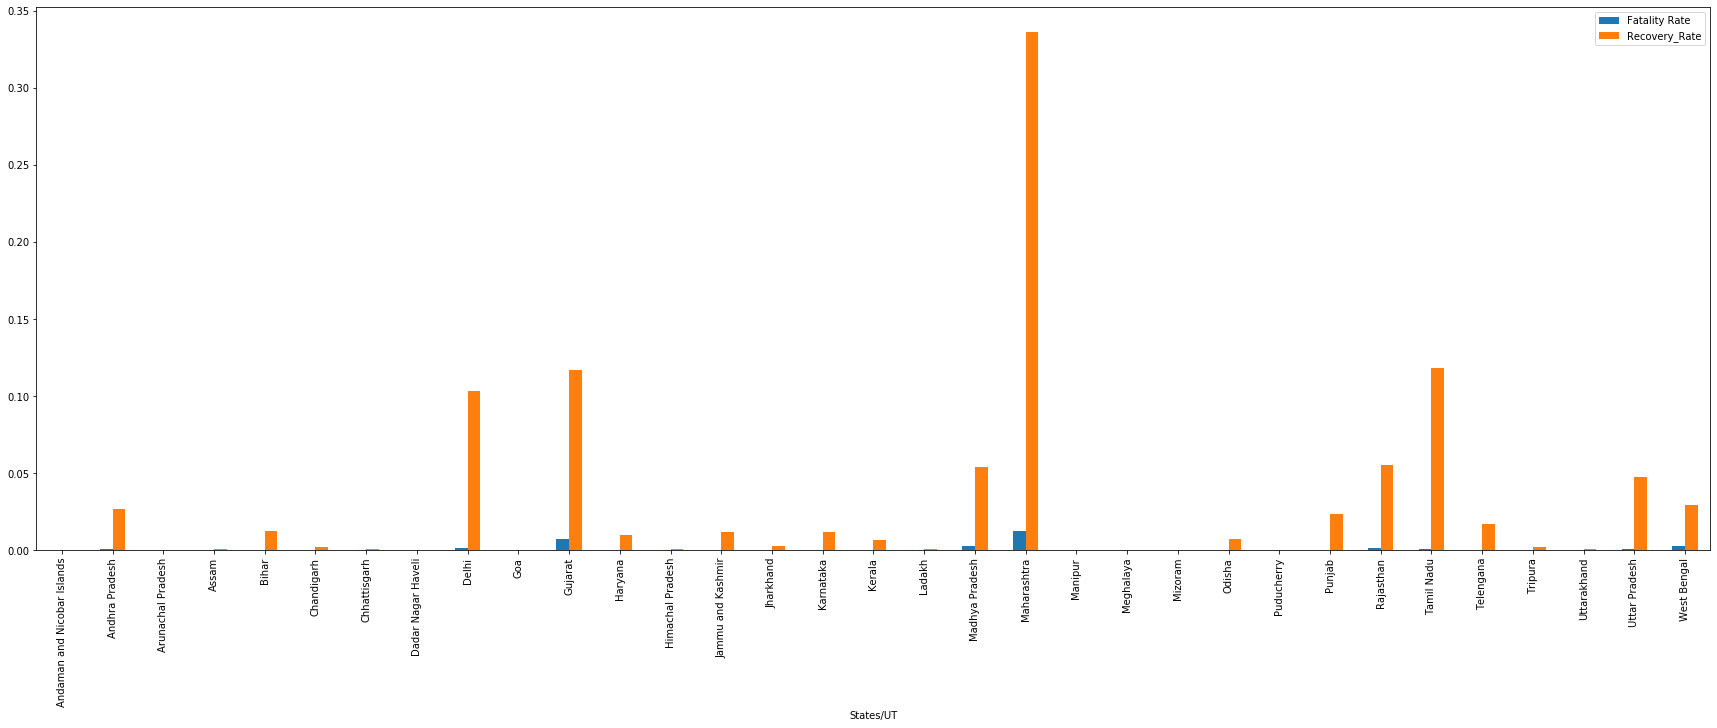

In [76]:
df_Fatality.plot(kind='bar',figsize=(30,10))
plt.show()

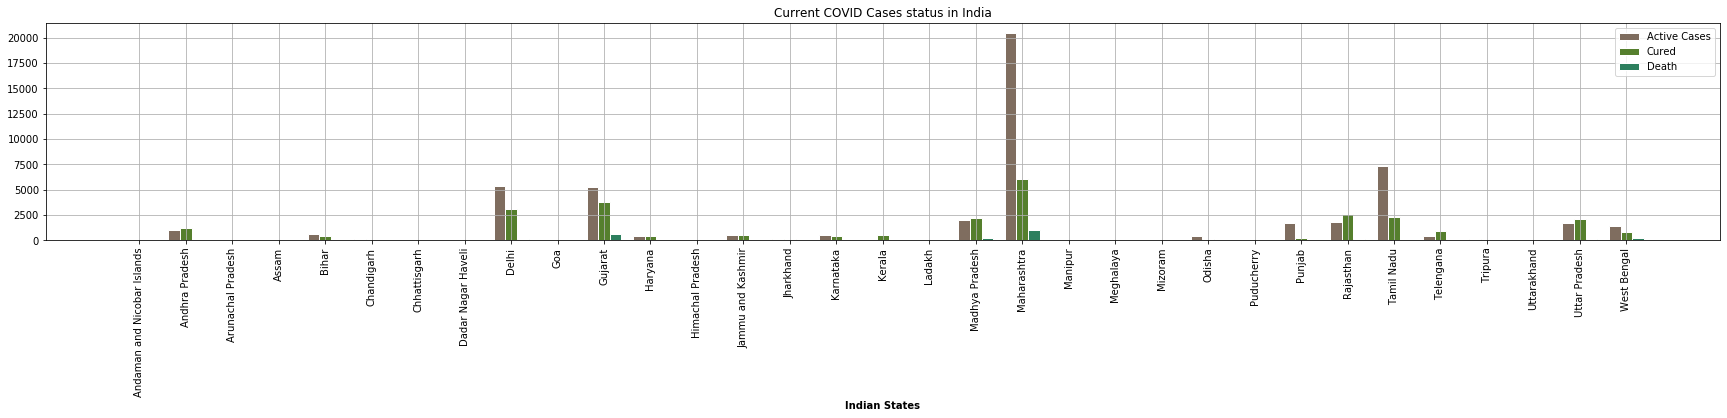

In [77]:
barWidth = 0.25
plt.figure(figsize=(30,4))
bars1 = df['Active Cases']
bars2 = df.Recovered
bars3 = df.Deceased

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Active Cases')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Cured')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Death')
 
# Add xticks on the middle of the group bars
plt.xlabel('Indian States', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df.index.values)
 
# Create legend & Show graphic
plt.title('Current COVID Cases status in India')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.legend()
plt.show()



# Customizing Style Sheet

In [78]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


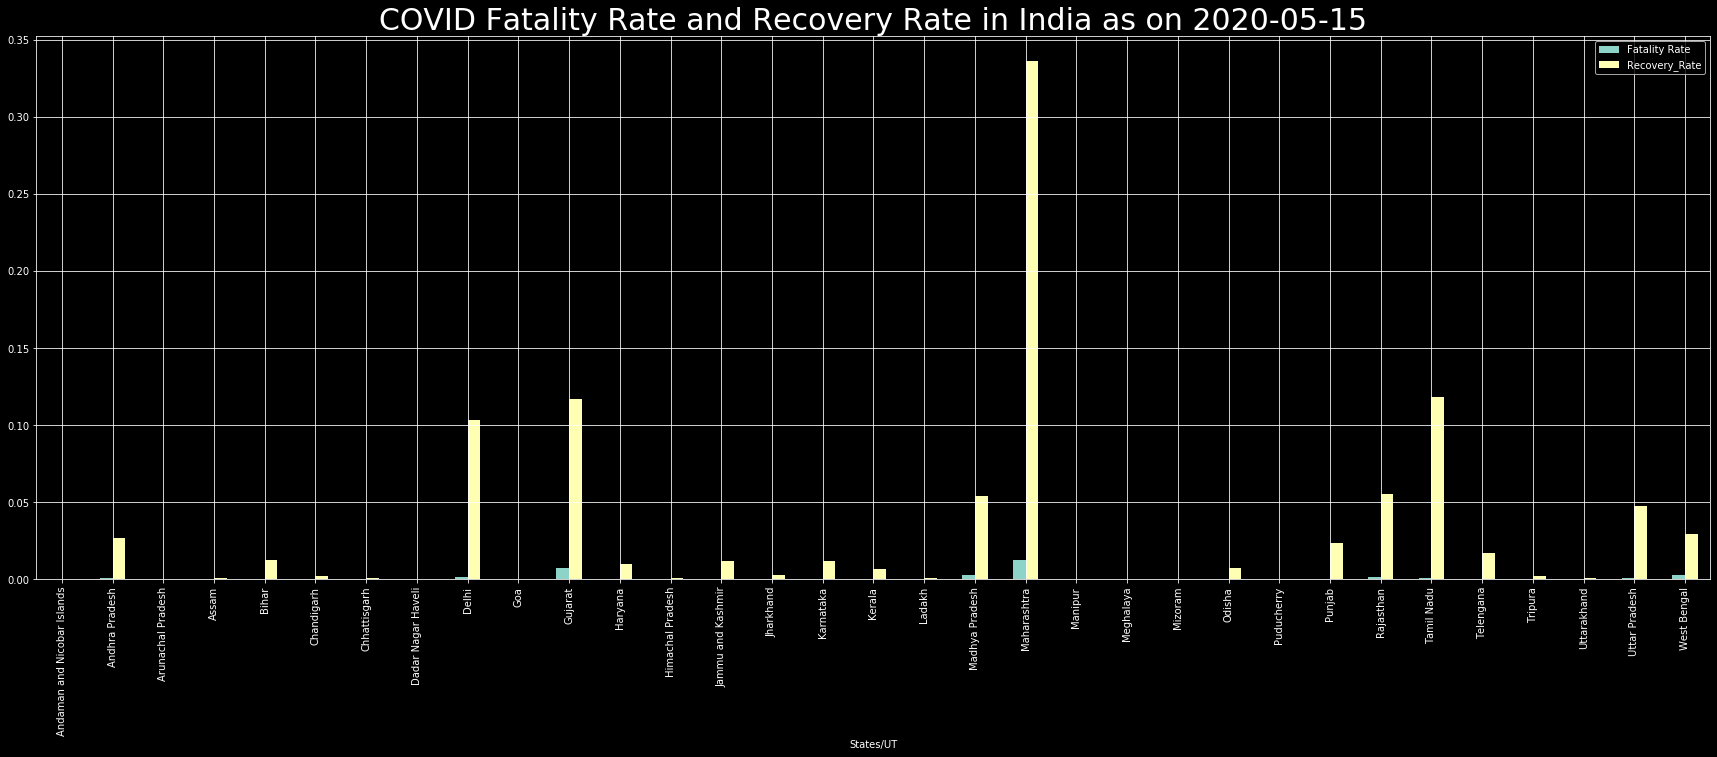

In [79]:
plt.style.use('dark_background')
df_Fatality.plot(kind='bar',figsize=(30,10))
plt.grid(True)
plt.title(f'COVID Fatality Rate and Recovery Rate in India as on {datetime.date.today()}',fontsize=30)
plt.show()

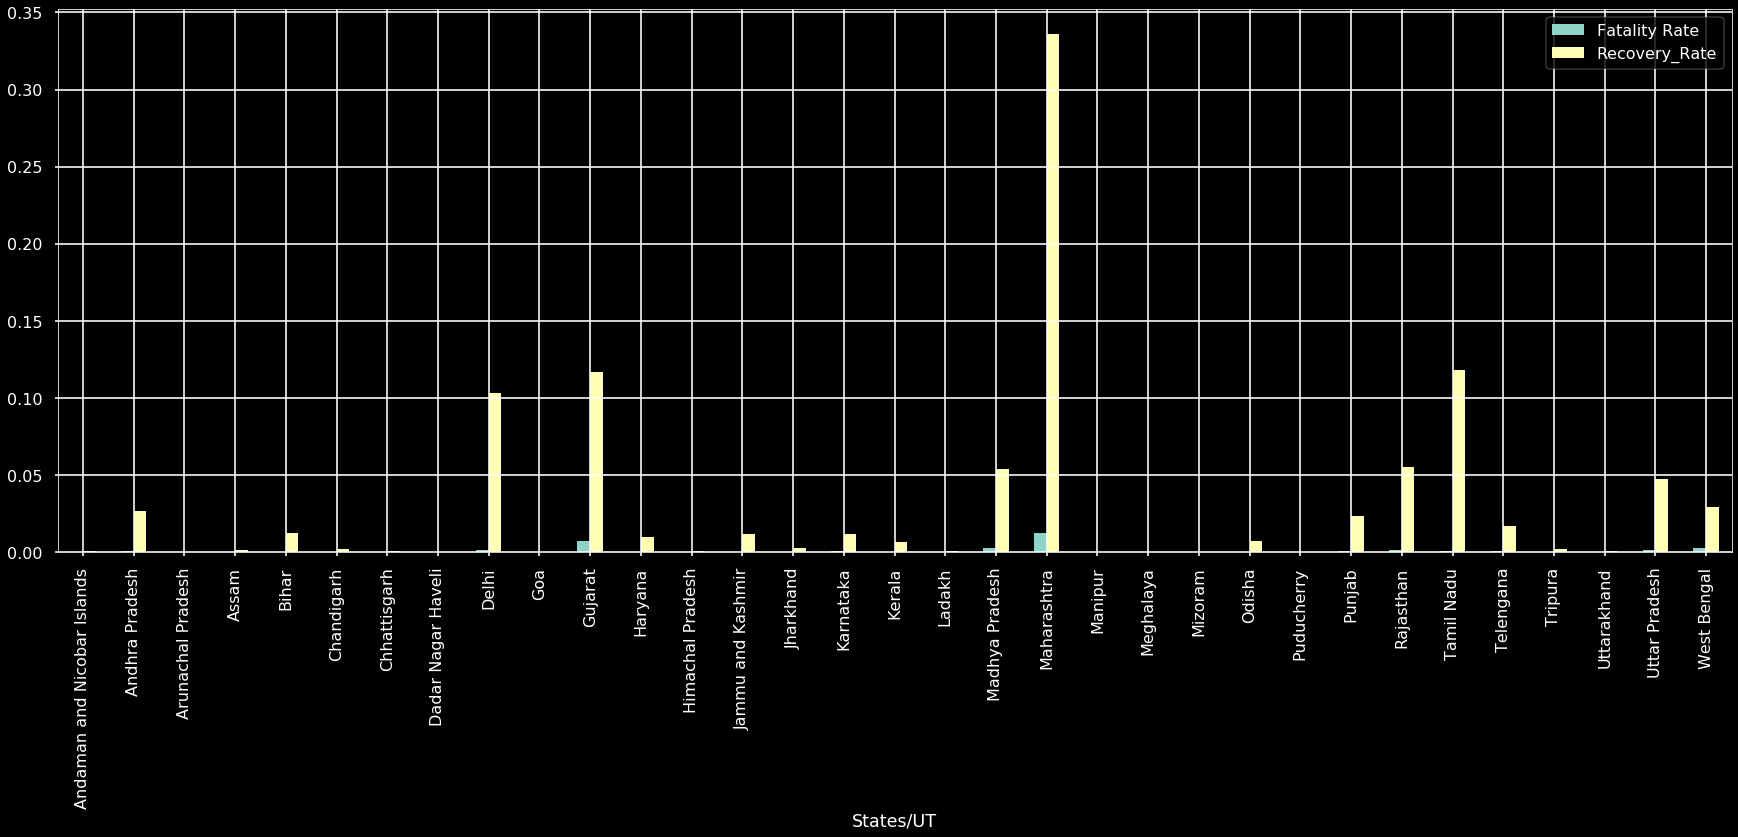

In [80]:
plt.style.use('seaborn-poster')
df_Fatality.plot(kind='bar',figsize=(30,10))
plt.grid(True)
plt.show()

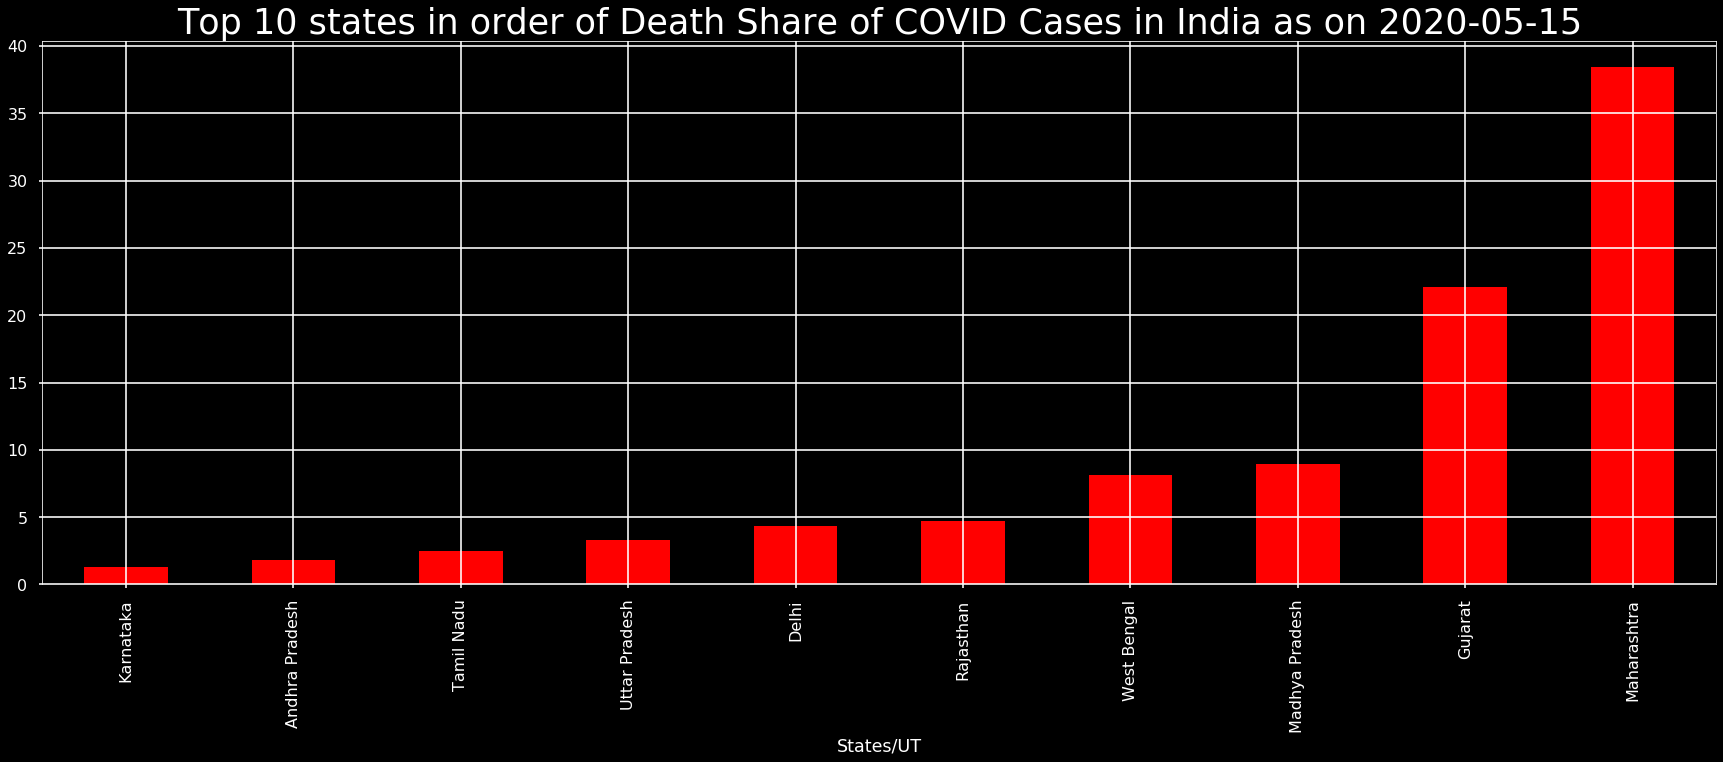

In [81]:
plt.style.use('seaborn-poster')
df['Death Share'].apply(lambda x:x*100).sort_values()[-10:].plot(kind='bar',figsize=(30,10),color='red')
plt.grid(True)
plt.title(f'Top 10 states in order of Death Share of COVID Cases in India as on {datetime.date.today()}',fontsize=35)
plt.show()

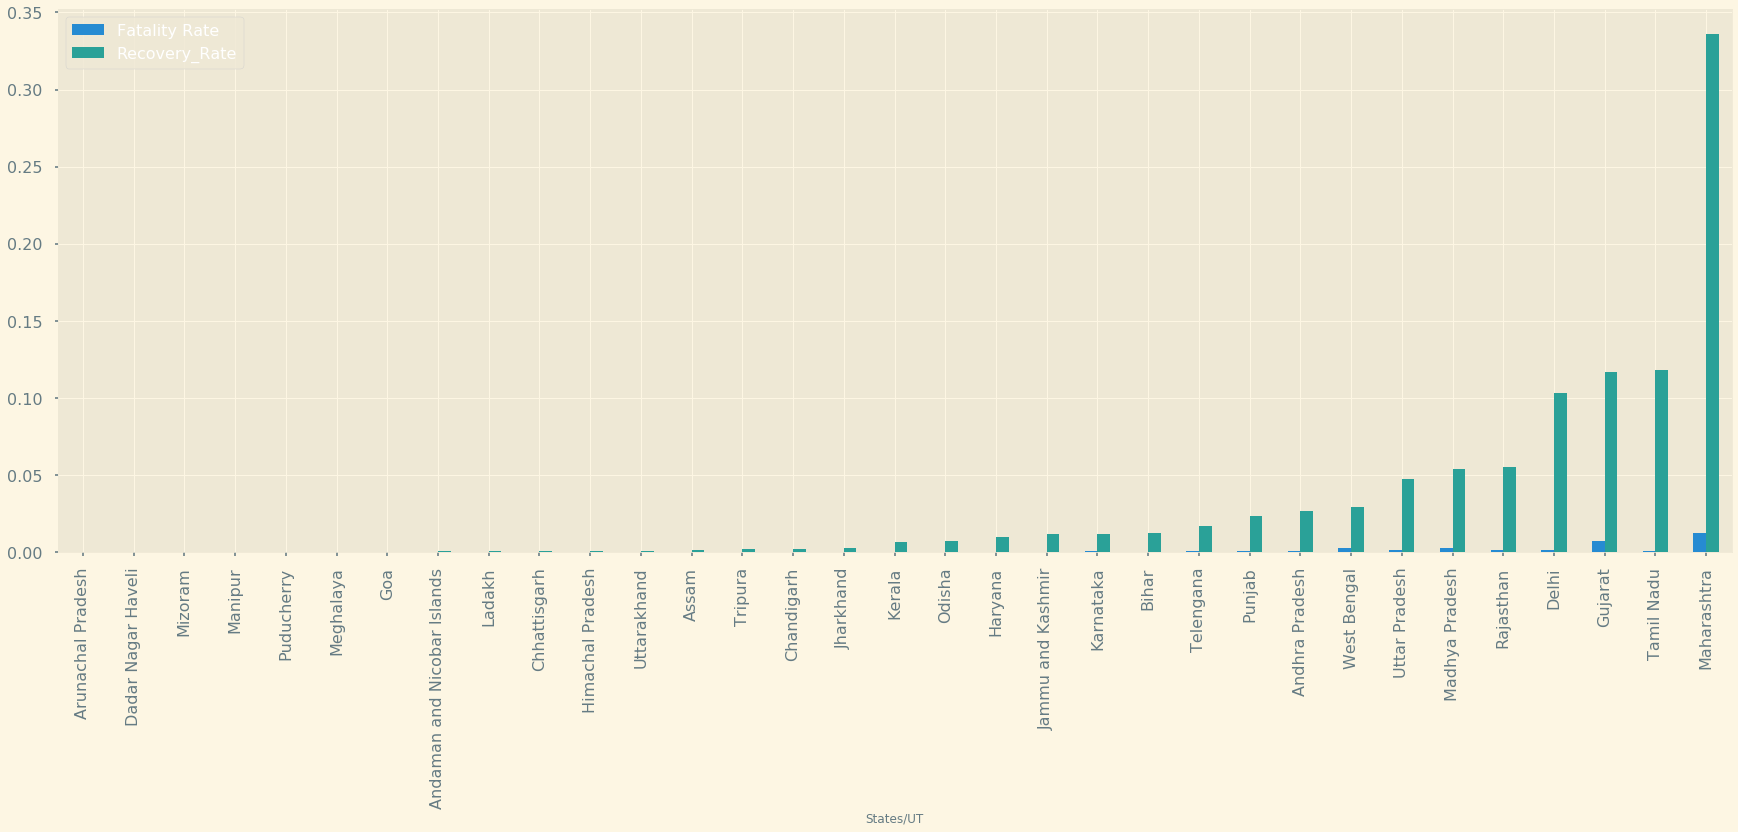

In [82]:
plt.style.use('Solarize_Light2')
df_Fatality.sort_values(by='Recovery_Rate').plot(kind='bar',figsize=(30,10))
plt.grid(True)
plt.show()

# Temporary Styling

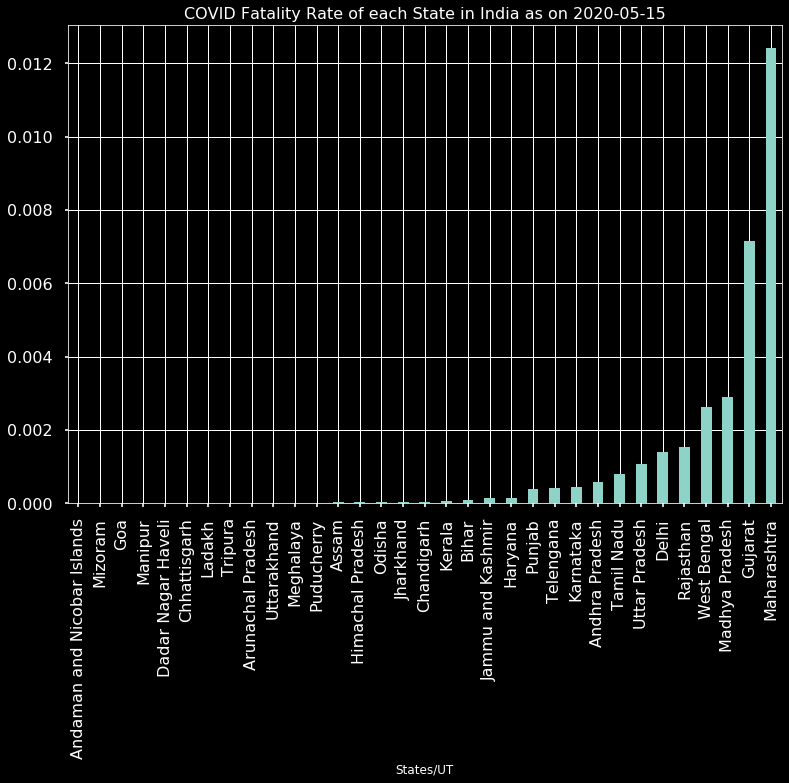

In [83]:
import datetime
with plt.style.context('dark_background'):
    df_Fatality['Fatality Rate'].sort_values().plot(kind='bar')
    plt.title(f'COVID Fatality Rate of each State in India as on {datetime.date.today()}')
plt.show()


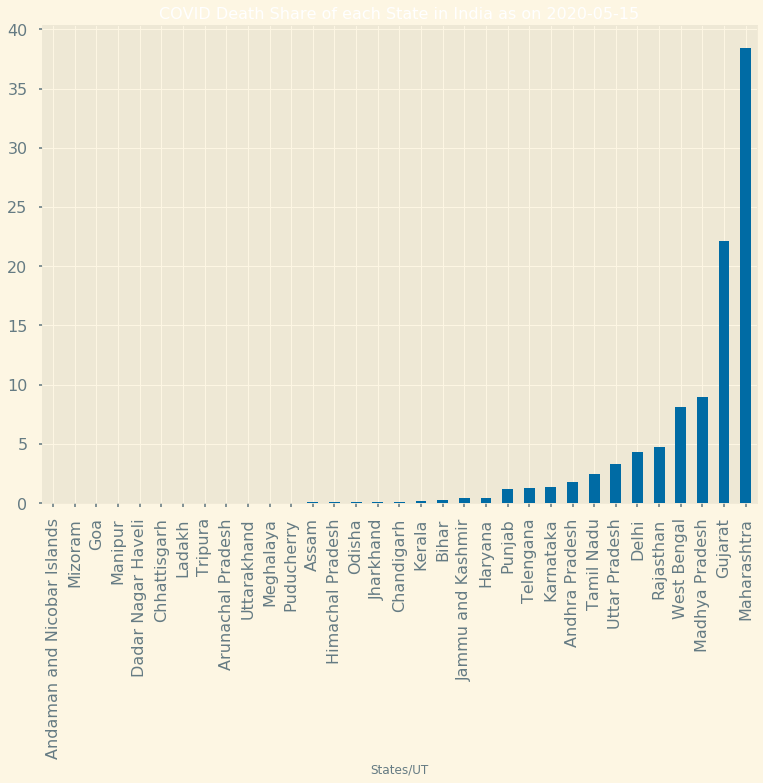

In [84]:
import datetime
with plt.style.context('tableau-colorblind10'):
    df['Death Share'].sort_values().apply(lambda x:x*100).plot(kind='bar')
    plt.title(f'COVID Death Share of each State in India as on {datetime.date.today()}')
plt.show()



# Using Global Styling

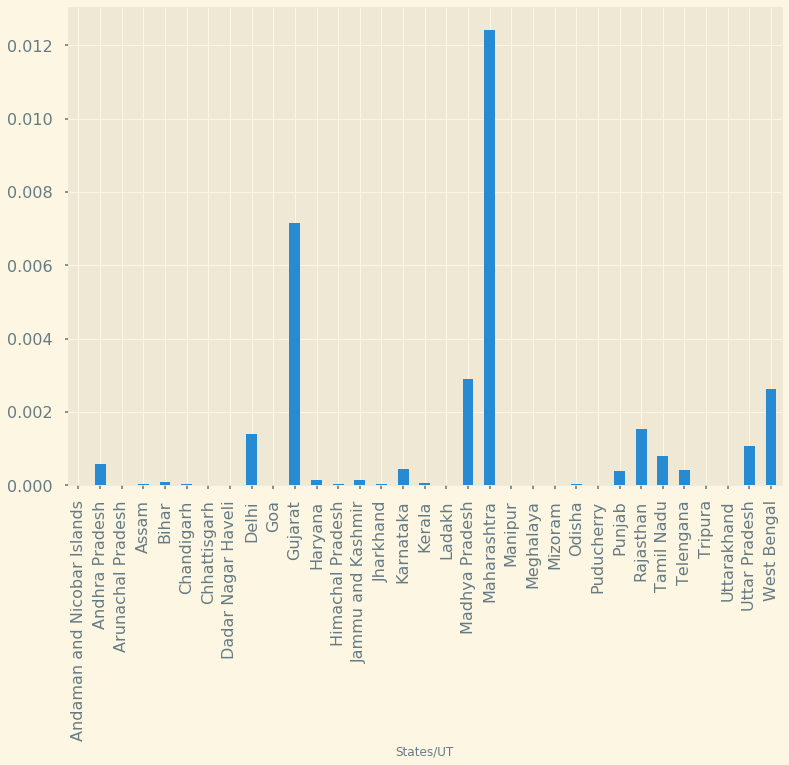

In [85]:
df_Fatality['Fatality Rate'].plot(kind='bar')
plt.show()

# Seaborn

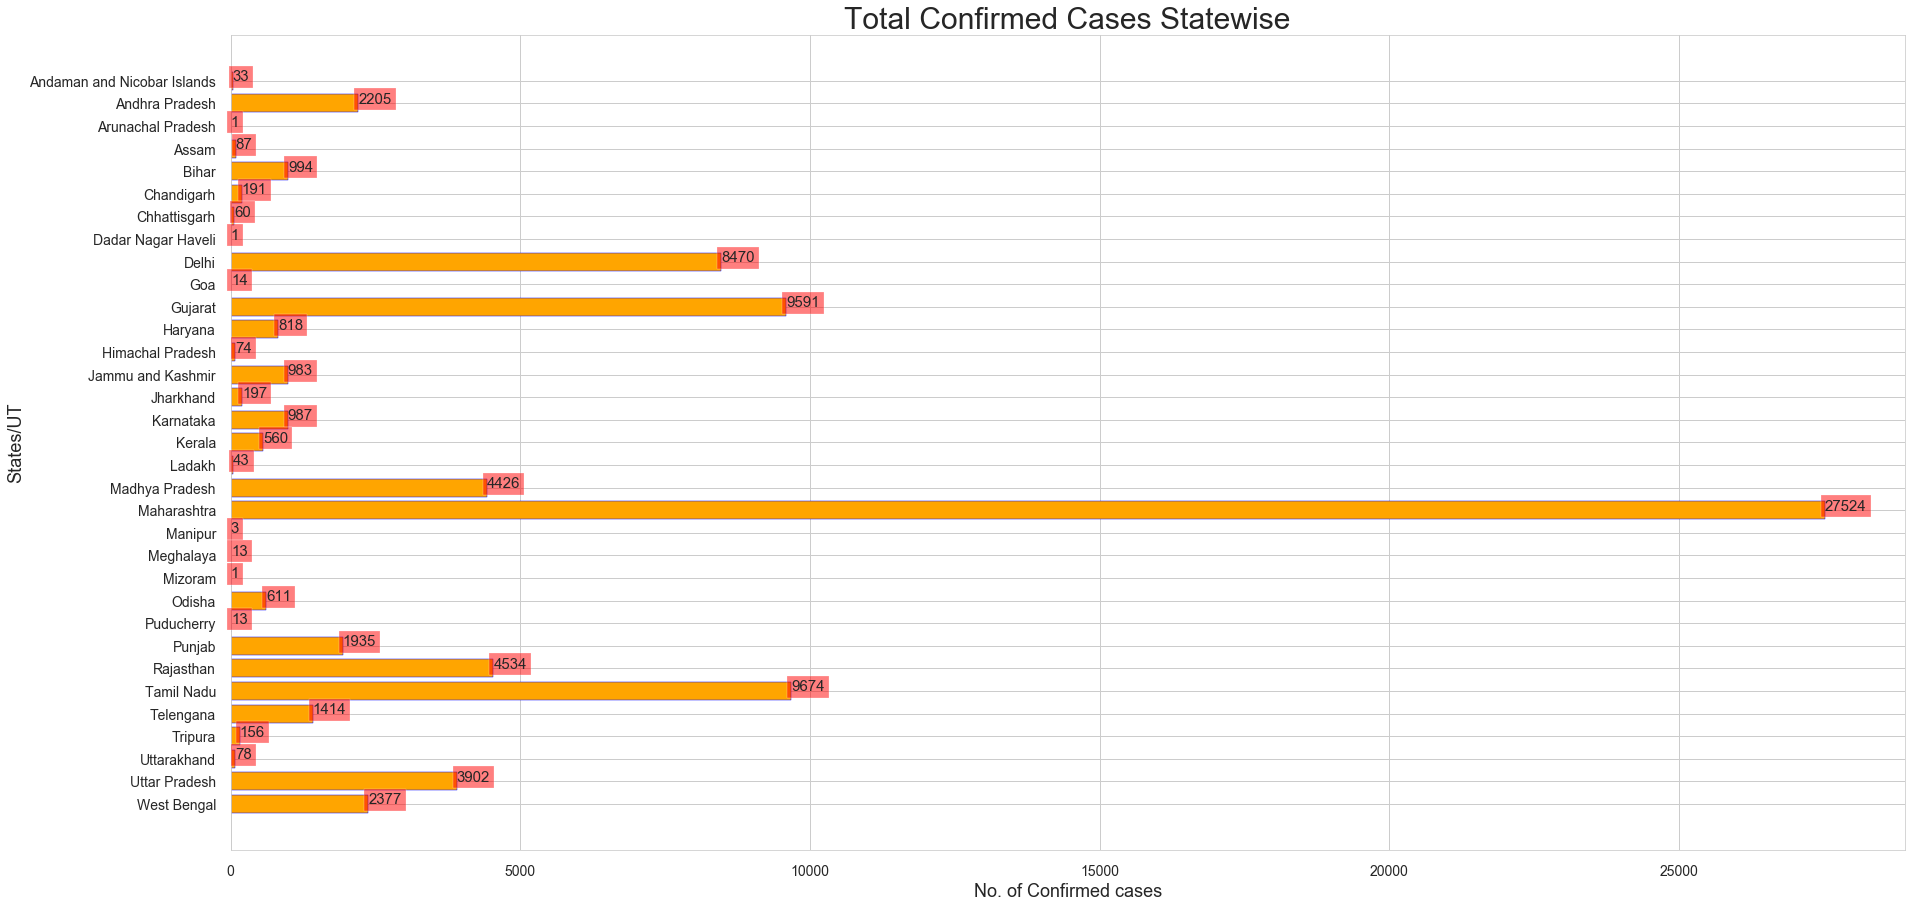

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize = (30,15))
plt.barh(state_data['States/UT'], state_data['Confirmed'],align = 'center',
                    color = 'orange', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize =30 )
for index, value in enumerate(state_data['Confirmed']):
    plt.text(value, index, str(value), fontsize = 15,bbox=dict(facecolor='red', alpha=0.5))
plt.show()

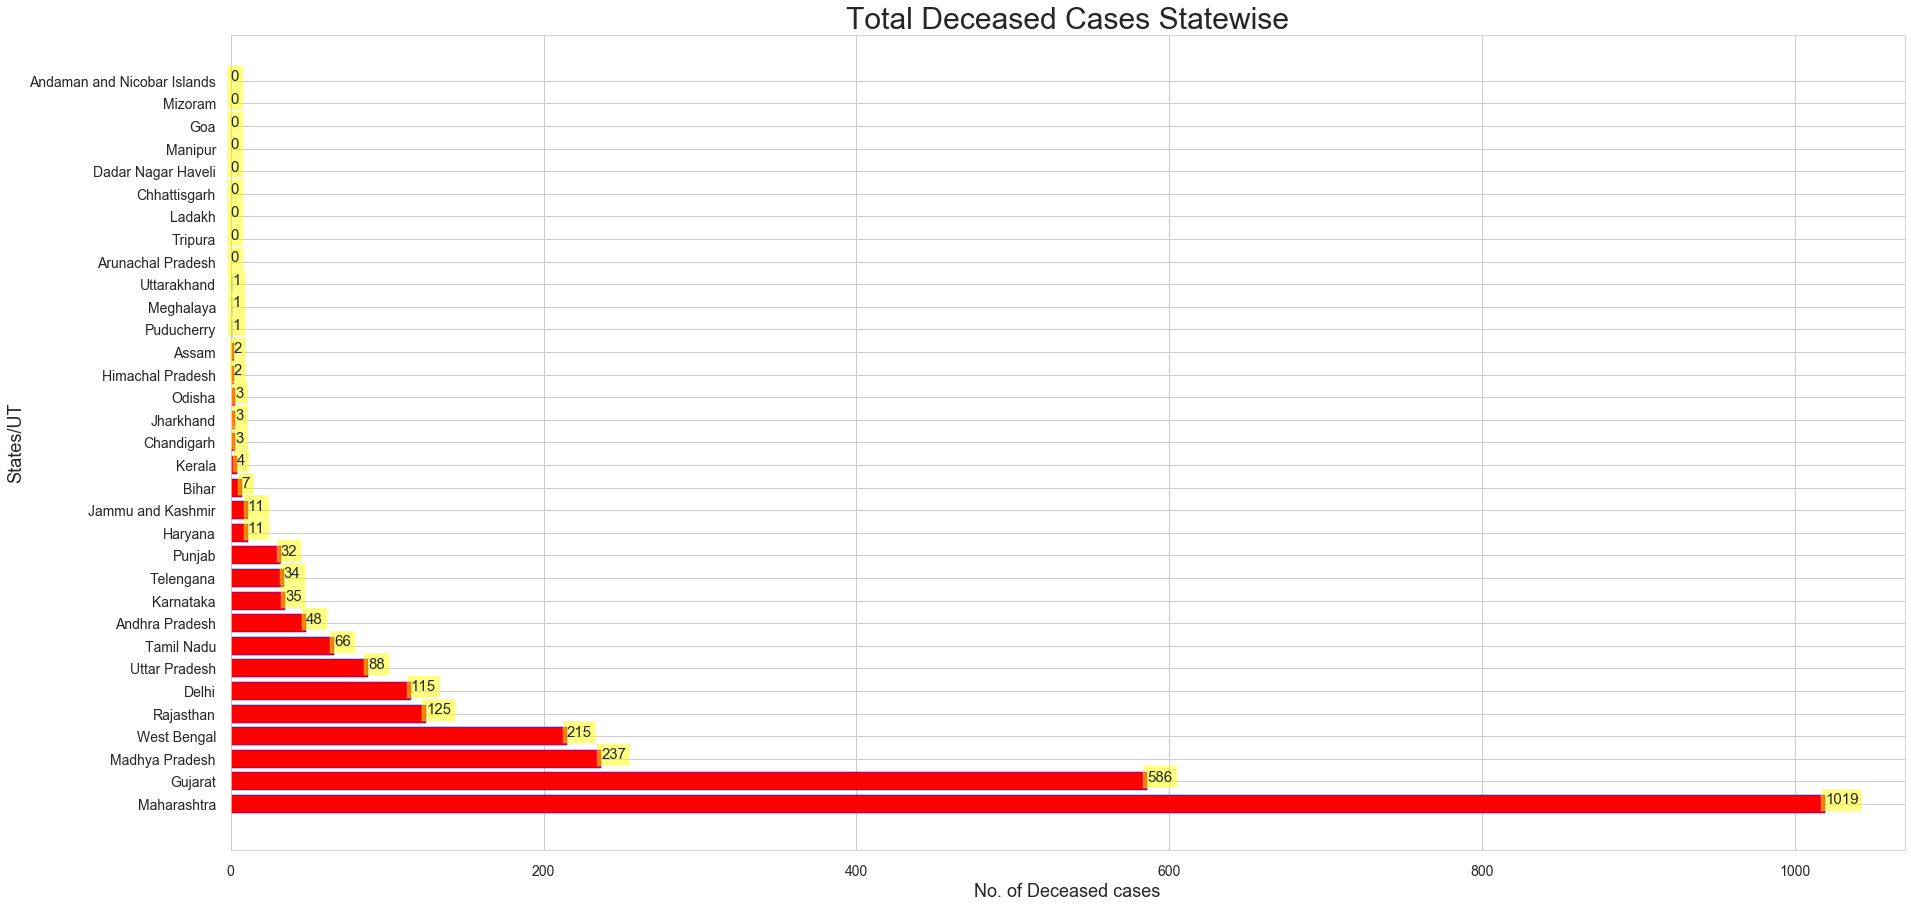

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize = (30,15))
plt.barh(state_data.sort_values(by='Deceased')['States/UT'], state_data['Deceased'].sort_values(),align = 'center',
                    color = 'red', edgecolor = 'blue')
plt.xlabel('No. of Deceased cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Deceased Cases Statewise', fontsize =30 )
for index, value in enumerate(state_data['Deceased'].sort_values()):
    plt.text(value, index, str(value), fontsize = 15,bbox=dict(facecolor='yellow', alpha=0.5))
#plt.savefig('Total Deceased Cases in INDIA - 14 May 2020')
plt.show()

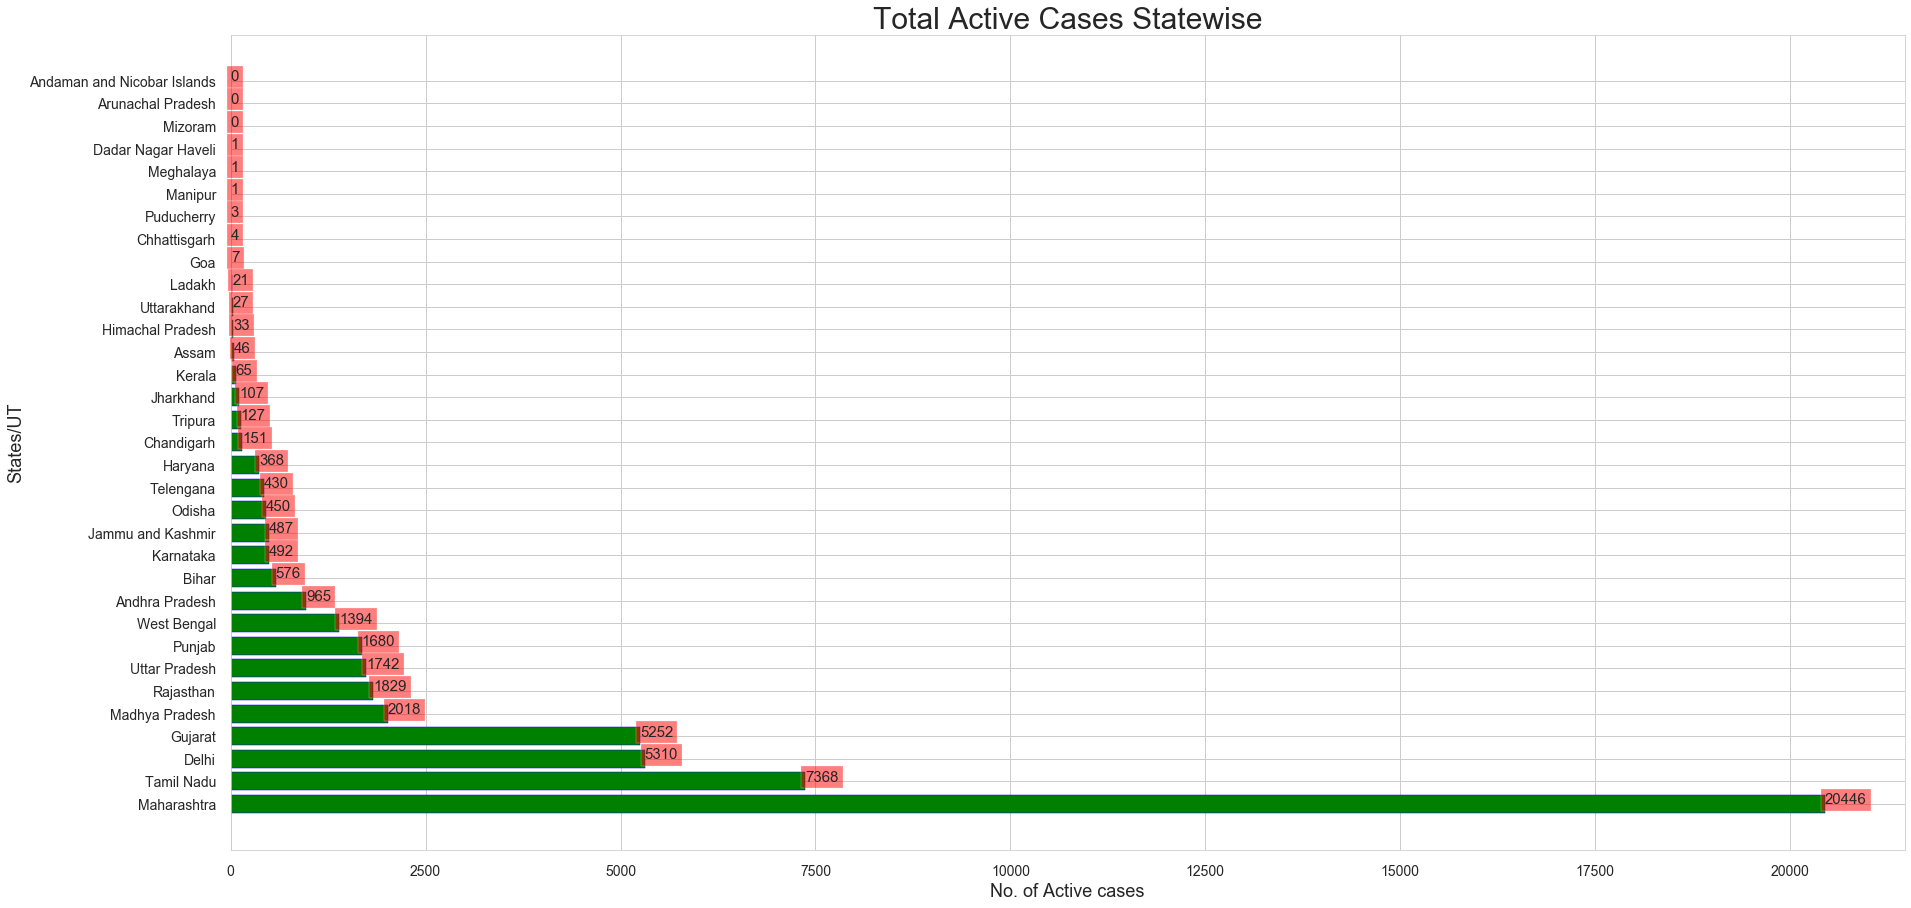

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize = (30,15))
plt.barh(df.sort_values(by='Active Cases').index, df['Active Cases'].sort_values(),align = 'center',
                    color = 'green', edgecolor = 'blue')
plt.xlabel('No. of Active cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Active Cases Statewise', fontsize =30 )
for index, value in enumerate(df['Active Cases'].sort_values()):
    plt.text(value, index, str(value), fontsize = 15,bbox=dict(facecolor='red', alpha=0.5))
plt.show()

# Write Dataframe to csv file

In [89]:


s='India COVID cases '+str(datetime.datetime.now()) +'.csv'
df.to_csv(s)

#s='Sorted India COVID cases '+str('14 May 2020') +'.csv'
#df.sort_values(by='Confirmed').to_csv(s)


# Donut Chart — Nationwide total Confirmed, Recovered and Deceased cases

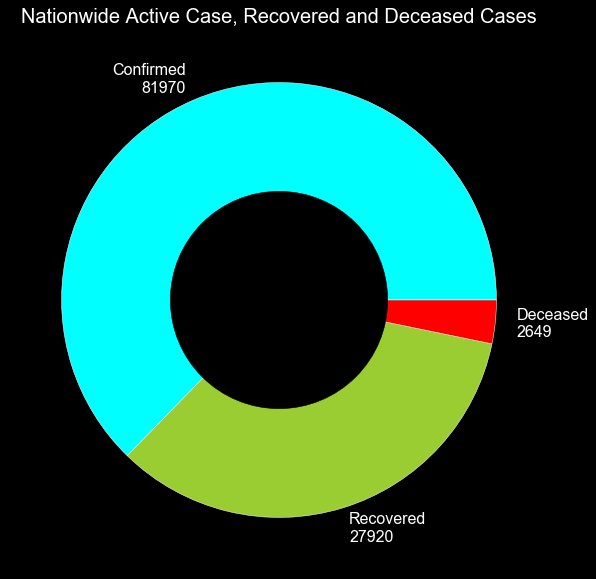

In [90]:
with plt.style.context('dark_background'):
    group_size = [sum(df['Active Cases']),
                  sum(df['Recovered']),
                  sum(df['Deceased'])]
    group_labels = ['Confirmed\n' + str(sum(df['Confirmed'])),
                    'Recovered\n' + str(sum(df['Recovered'])),
                    'Deceased\n' + str(sum(df['Deceased']))]
    custom_colors = ['cyan','yellowgreen','red']
    plt.figure(figsize = (10,10))
    plt.pie(group_size, labels = group_labels, colors = custom_colors)
    central_circle = plt.Circle((0,0), 0.5, color = 'black')
    fig = plt.gcf()
    fig.gca().add_artist(central_circle)
    plt.rc('font', size = 12)
    plt.title('Nationwide Active Case, Recovered and Deceased Cases', fontsize = 20)
plt.show()

# Pie Chart

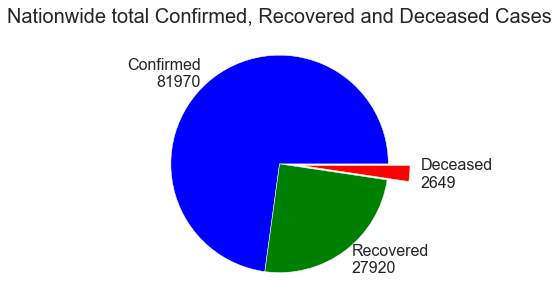

In [91]:
group_size = [sum(state_data['Confirmed']),
                  sum(state_data['Recovered']),
                  sum(state_data['Deceased'])]
group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])),
                    'Recovered\n' + str(sum(state_data['Recovered'])),
                    'Deceased\n' + str(sum(state_data['Deceased']))]
custom_colors = ['blue','green','red']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors,explode=[0,0,0.2])
plt.rc('font', size = 15)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 20)
plt.show()

# Plotly Pie Charts

In [92]:
state_data1 = pd.DataFrame(state_data)
state_data1.set_index('States/UT',drop=True,inplace=True)
state_data1.drop(columns=['Sr.No'])

Confirmed  Recovered  Deceased
States/UT                                                  
Andaman and Nicobar Islands         33         33         0
Andhra Pradesh                    2205       1192        48
Arunachal Pradesh                    1          1         0
Assam                               87         39         2
Bihar                              994        411         7
Chandigarh                         191         37         3
Chhattisgarh                        60         56         0
Dadar Nagar Haveli                   1          0         0
Delhi                             8470       3045       115
Goa                                 14          7         0
Gujarat                           9591       3753       586
Haryana                            818        439        11
Himachal Pradesh                    74         39         2
Jammu and Kashmir                  983        485        11
Jharkhand                          197         87         3
Karnataka                          987        460        35
Kerala                             560        491         4
Ladakh                              43         22         0
Madhya Pradesh                    4426       2171       237
Maharashtra                      27524       6059      1019
Manipur                              3          2         0
Meghalaya                           13         11         1
Mizoram                              1          1         0
Odisha                             611        158         3
Puducherry                          13          9         1
Punjab                            1935        223        32
Rajasthan                         4534       2580       125
Tamil Nadu                        9674       2240        66
Telengana                         1414        950        34
Tripura                            156         29         0
Uttarakhand                         78         50         1
Uttar Pradesh                     3902       2072        88
West Bengal                       2377        768       215

In [93]:
state_data.columns

Index(['Sr.No', 'Confirmed', 'Recovered', 'Deceased'], dtype='object')

In [94]:
#https://plotly.com/python/pie-charts/
import plotly.express as px
fig = px.pie(state_data1, values='Confirmed', names=state_data.index, title=f'Statewise Confirmed Cases in India as on {datetime.date.today()}',
             color_discrete_sequence=px.colors.sequential.RdBu,
            hover_data=['Recovered'], labels={'Recovered':'Recovered'})
fig.update_traces(textposition='inside', textinfo='percent+label')
s=str(datetime.datetime.now())+' Plotly_India_Confirmed_pie.html'
fig.write_html(s)
fig.show()

# Bubble Charts

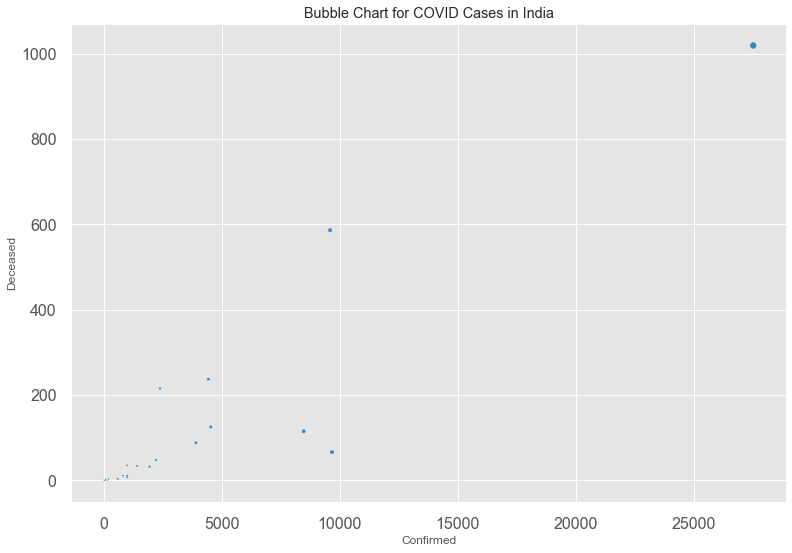

In [95]:
plt.style.use('ggplot')
df.plot(kind='scatter', x='Confirmed', y='Deceased', s=df['Recovery_Rate']*100);
plt.title('Bubble Chart for COVID Cases in India')
plt.show()

In [96]:
df

Confirmed  Recovered  Deceased  Active Cases  \
States/UT                                                                   
Andaman and Nicobar Islands         33         33         0             0   
Andhra Pradesh                    2205       1192        48           965   
Arunachal Pradesh                    1          1         0             0   
Assam                               87         39         2            46   
Bihar                              994        411         7           576   
Chandigarh                         191         37         3           151   
Chhattisgarh                        60         56         0             4   
Dadar Nagar Haveli                   1          0         0             1   
Delhi                             8470       3045       115          5310   
Goa                                 14          7         0             7   
Gujarat                           9591       3753       586          5252   
Haryana                            818        439        11           368   
Himachal Pradesh                    74         39         2            33   
Jammu and Kashmir                  983        485        11           487   
Jharkhand                          197         87         3           107   
Karnataka                          987        460        35           492   
Kerala                             560        491         4            65   
Ladakh                              43         22         0            21   
Madhya Pradesh                    4426       2171       237          2018   
Maharashtra                      27524       6059      1019         20446   
Manipur                              3          2         0             1   
Meghalaya                           13         11         1             1   
Mizoram                              1          1         0             0   
Odisha                             611        158         3           450   
Puducherry                          13          9         1             3   
Punjab                            1935        223        32          1680   
Rajasthan                         4534       2580       125          1829   
Tamil Nadu                        9674       2240        66          7368   
Telengana                         1414        950        34           430   
Tripura                            156         29         0           127   
Uttarakhand                         78         50         1            27   
Uttar Pradesh                     3902       2072        88          1742   
West Bengal                       2377        768       215          1394   

                             Recovery_Rate  Fatality Rate  Death Share  
States/UT                                                               
Andaman and Nicobar Islands       0.000403       0.000000     0.000000  
Andhra Pradesh                    0.026900       0.000586     0.018120  
Arunachal Pradesh                 0.000012       0.000000     0.000000  
Assam                             0.001061       0.000024     0.000755  
Bihar                             0.012126       0.000085     0.002643  
Chandigarh                        0.002330       0.000037     0.001133  
Chhattisgarh                      0.000732       0.000000     0.000000  
Dadar Nagar Haveli                0.000012       0.000000     0.000000  
Delhi                             0.103330       0.001403     0.043413  
Goa                               0.000171       0.000000     0.000000  
Gujarat                           0.117006       0.007149     0.221216  
Haryana                           0.009979       0.000134     0.004153  
Himachal Pradesh                  0.000903       0.000024     0.000755  
Jammu and Kashmir                 0.011992       0.000134     0.004153  
Jharkhand                         0.002403       0.000037     0.001133  
Karnataka                         0.012041       0.000427     0.013213  
Kerala             

# Pyplot

In [97]:
fig = go.Figure(data=[go.Scatter(
    x=df['Confirmed'], y=df['Deceased'],
    mode='markers',
    marker_size=df['Recovery_Rate']*100)
])
fig.show()

In [98]:
fig = px.scatter(x=df['Confirmed'], y=df['Deceased'],size=df['Recovery_Rate']*100,
                 color=df.index,
                 hover_name=df.index, log_x=True, size_max=60)
fig.show()

# Chloropleth map of the total Confirmed Cases in India

https://map.igismap.com/share-map/export-layer/Indian_States/06409663226af2f3114485aa4e0a23b4

In [107]:
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

States/UT                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...

In [100]:
map_data['States/UT'] = map_data['States/UT'].str.replace('&','and')
map_data['States/UT'].replace('Arunanchal Pradesh','Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana','Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 'Andaman and Nicobar Islands',inplace = True)

In [101]:
map_data.head()

States/UT  \
0  Andaman and Nicobar Islands   
1            Arunachal Pradesh   
2                        Assam   
3                        Bihar   
4                   Chandigarh   

                                            geometry  
0  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...  
1  POLYGON ((96.16261 29.38078, 96.16860 29.37432...  
2  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...  
3  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...  
4  POLYGON ((76.84147 30.75996, 76.83599 30.73623...

In [102]:
state_data.head()

Sr.No  Confirmed  Recovered  Deceased
States/UT                                                        
Andaman and Nicobar Islands     1         33         33         0
Andhra Pradesh                  2       2205       1192        48
Arunachal Pradesh               3          1          1         0
Assam                           4         87         39         2
Bihar                           5        994        411         7

# Merging 

In [103]:
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.head()

States/UT  \
0  Andaman and Nicobar Islands   
1            Arunachal Pradesh   
2                        Assam   
3                        Bihar   
4                   Chandigarh   

                                            geometry Sr.No  Confirmed  \
0  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...     1       33.0   
1  POLYGON ((96.16261 29.38078, 96.16860 29.37432...     3        1.0   
2  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...     4       87.0   
3  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...     5      994.0   
4  POLYGON ((76.84147 30.75996, 76.83599 30.73623...     6      191.0   

   Recovered  Deceased  
0       33.0       0.0  
1        1.0       0.0  
2       39.0       2.0  
3      411.0       7.0  
4       37.0       3.0

In [104]:
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

States/UT  \
0  Andaman and Nicobar Islands   
1            Arunachal Pradesh   
2                        Assam   
3                        Bihar   
4                   Chandigarh   

                                            geometry  Confirmed  Recovered  \
0  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...       33.0       33.0   
1  POLYGON ((96.16261 29.38078, 96.16860 29.37432...        1.0        1.0   
2  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...       87.0       39.0   
3  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...      994.0      411.0   
4  POLYGON ((76.84147 30.75996, 76.83599 30.73623...      191.0       37.0   

   Deceased  
0       0.0  
1       0.0  
2       2.0  
3       7.0  
4       3.0

# Plotting COVID cases on India Map using GeoPandas

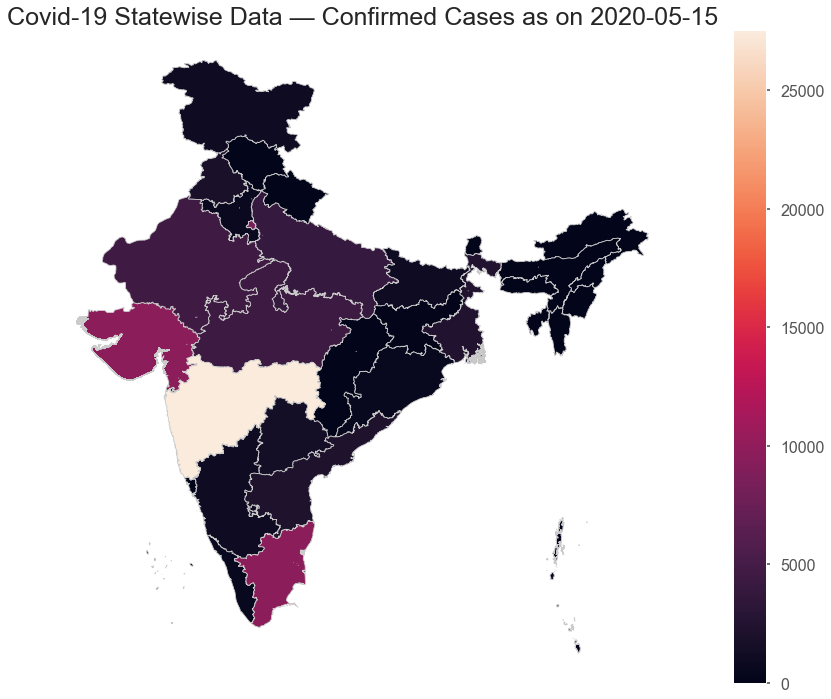

In [105]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title(f'Covid-19 Statewise Data — Confirmed Cases as on {datetime.date.today()}', fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', linewidth=0.8, ax=ax, edgecolor='1.8', legend = True)
plt.show()

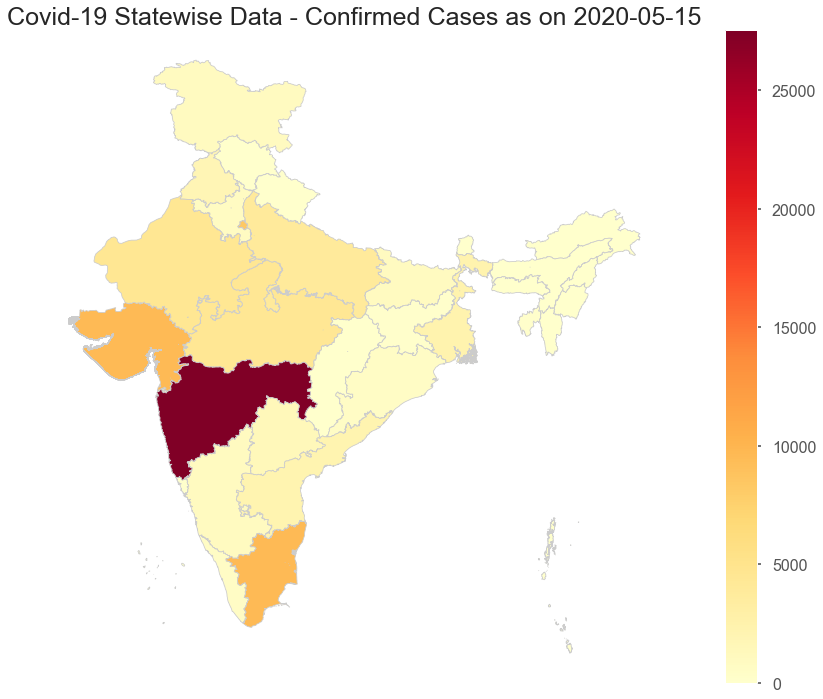

In [106]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title(f'Covid-19 Statewise Data - Confirmed Cases as on {datetime.date.today()}', fontdict = {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()